## SBI Life insurance Dataset

This is "SBI Insurance Claim Prediction Dataset" which based on "[Medical Cost Personal Datasets][1]" to update sample value on top.I have collected this dataset fro github link(https://github.com/dsrscientist/DSData).Here we have to predict wheteher the person is eligible for insurance claim or not based on other given features.

I have imported numpy and pandas libraries for data operations.matplotlib and seaborn for visualization purpose and sklearn libraries for modelling process.

In [16]:
#Importing the required libraries and metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

In [17]:
#Let import the csv files and put in the Dataframe
sbi=pd.read_csv('C:/Users/hp/Downloads/DSData-master/SBI_Life_insurance.csv')
claim=pd.DataFrame(sbi)

#Take a look for structure of data
claim.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [18]:
#checking for the information of each feature
claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [19]:
#shape of the data
claim.shape

(1338, 8)

In [20]:
#lets check for the null values in the dataset
claim.isnull().sum()
#So we get there is no null values in any column here

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [21]:
#checking for the skew values in data
claim.skew()

age               0.055673
sex              -0.020951
bmi               0.284047
children          0.938380
smoker            1.464766
region           -0.038101
charges           1.515880
insuranceclaim   -0.346254
dtype: float64

In [22]:
#handling skew more than 0.55 in all columns
for col in claim.columns:
    if claim[col].skew()>0.55:
        claim[col]=np.log1p(claim[col])

Data Visualisation

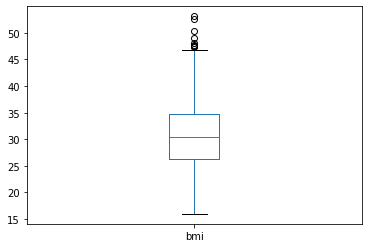

In [23]:
#plotting the boxplot for bmi column to check for outliers
claim['bmi'].plot.box()
#Here we get there is some outliers in the data

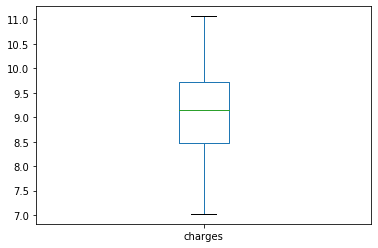

In [24]:
#plotting the boxplot for charges column to check for outliers
claim['charges'].plot.box()
#Here we get there is large no.of outliers in the data

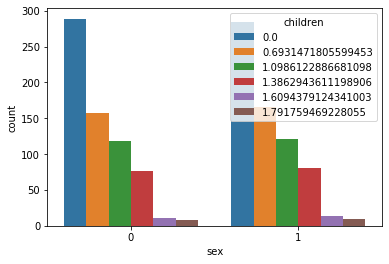

In [25]:
#plotting the countplot for gettng sex to children ratio
sns.countplot(x='sex',hue='children',data=claim)

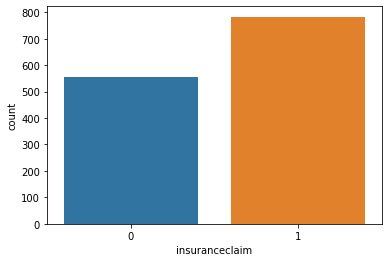

In [26]:
sns.countplot(x="insuranceclaim",data=claim)
#data is imbalanced but both instance has significance no.of values

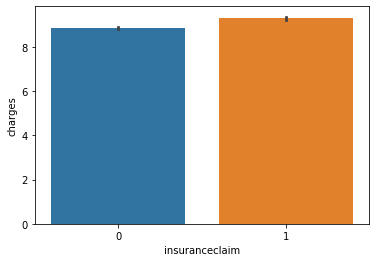

In [27]:
#plotting of barplot on insurance claim wrt to charges
sns.barplot(x='insuranceclaim',y='charges',data=claim)
#both 

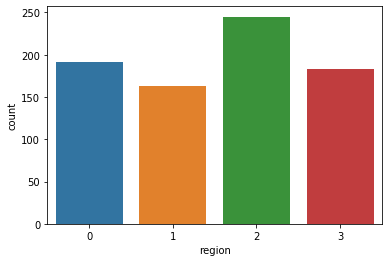

In [28]:
#plotting of countplot for number of claims per region
sns.countplot(x="region",data=claim.loc[claim["insuranceclaim"]==1])
#highest number of claim are from 2nd region

In [29]:
#lets decribe the data for statistical summary
claim.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,0.581751,0.141945,1.515695,9.098828,0.585202
std,14.049960,0.500160,6.098187,0.558325,0.279819,1.104885,0.919379,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,7.023647,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,8.464064,0.000000
50%,39.000000,1.000000,30.400000,0.693147,0.000000,2.000000,9.146658,1.000000
75%,51.000000,1.000000,34.693750,1.098612,0.000000,2.000000,9.719618,1.000000
max,64.000000,1.000000,53.130000,1.791759,0.693147,3.000000,11.063061,1.000000


This shows we have fair data to process furthur.mean,median and min-max values are in the ideal way.

In [30]:
#getting the correlation among the data
claimcor=claim.corr()
claimcor

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.048406,-0.025019,0.002127,0.527807,0.113723
sex,-0.020856,1.000000,0.046371,0.016296,0.076185,0.004588,0.005644,0.031565
bmi,0.109272,0.046371,1.000000,0.016178,0.003750,0.157566,0.132678,0.384198
children,0.048406,0.016296,0.016178,1.000000,0.013245,0.013722,0.171762,-0.424927
smoker,-0.025019,0.076185,0.003750,0.013245,1.000000,-0.002181,0.665539,0.333261
region,0.002127,0.004588,0.157566,0.013722,-0.002181,1.000000,-0.042683,0.020891
charges,0.527807,0.005644,0.132678,0.171762,0.665539,-0.042683,1.000000,0.232333
insuranceclaim,0.113723,0.031565,0.384198,-0.424927,0.333261,0.020891,0.232333,1.000000


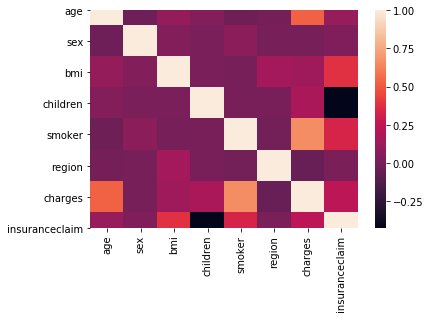

In [31]:
#Correlation using heatmap
sns.heatmap(claim.corr())

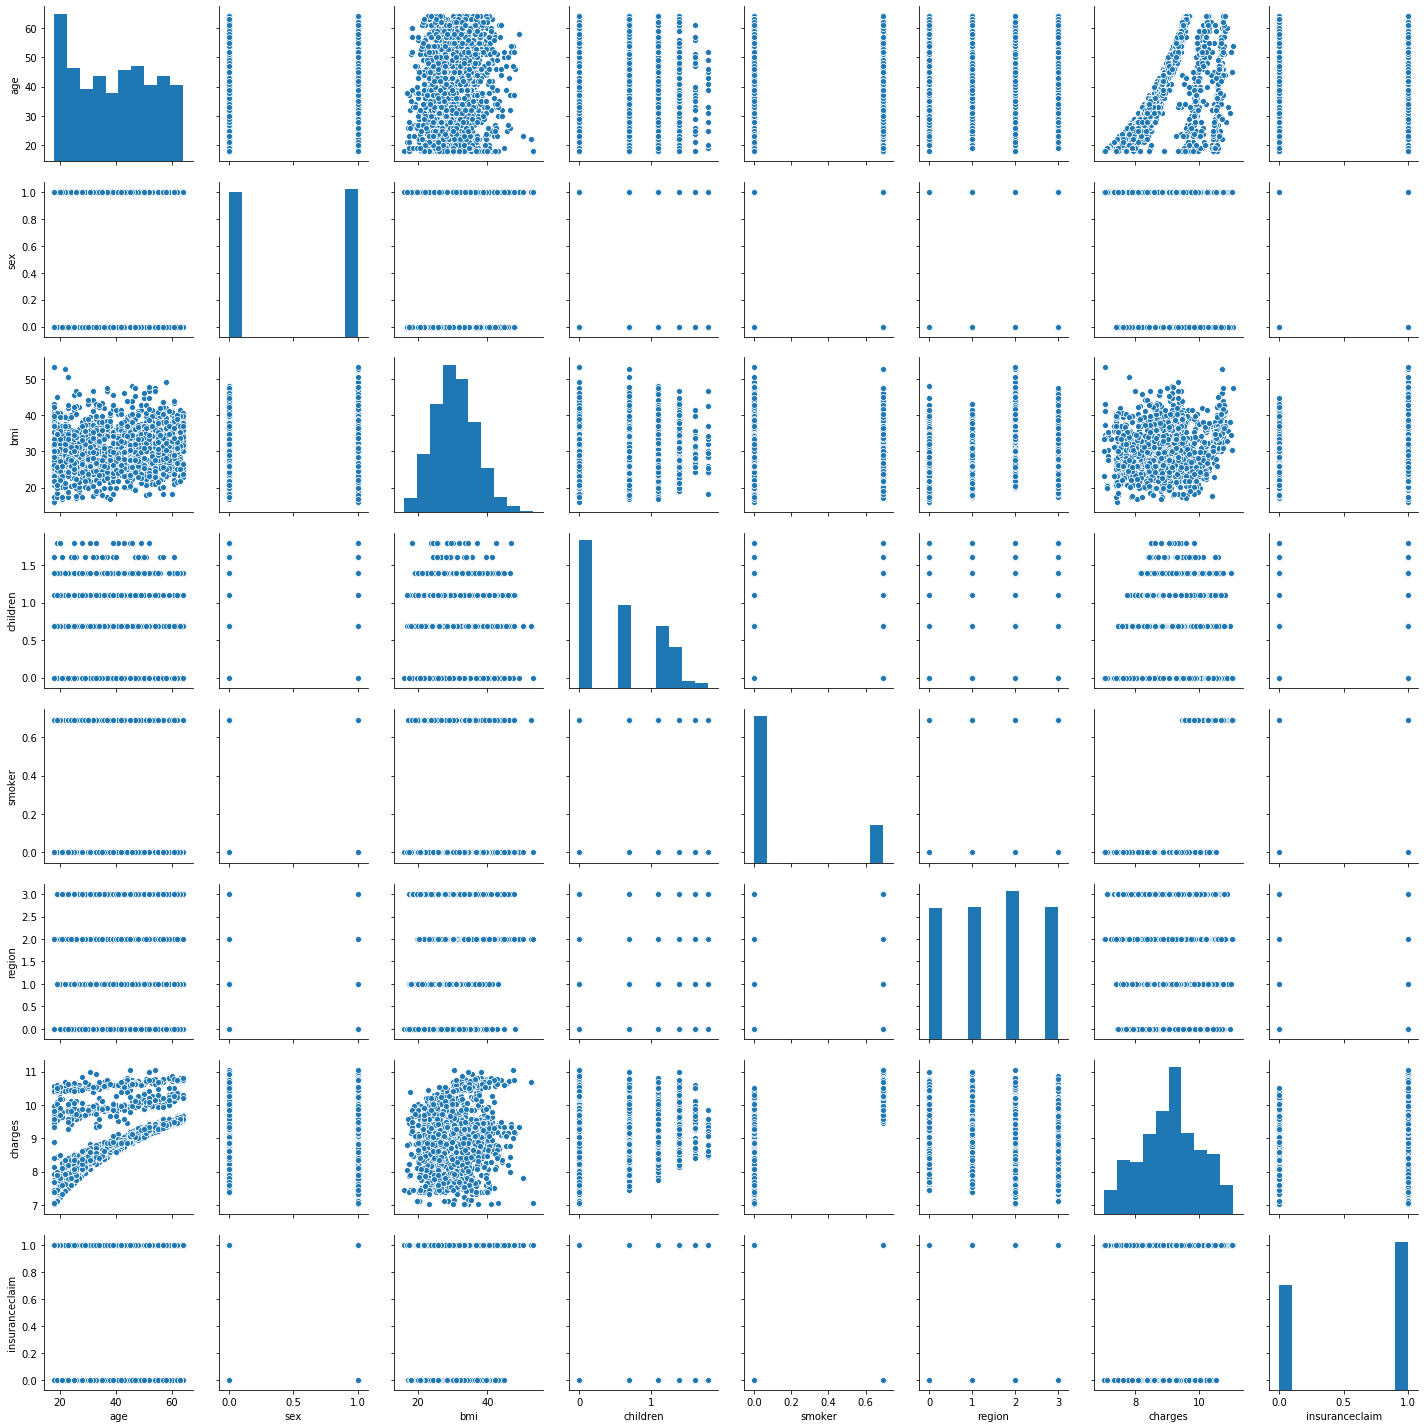

In [32]:
sns.pairplot(claim)

Shaping of the data for machine learning

In [33]:
#seperation of input and target variables
mod_x=claim.iloc[:,:-1]
y=claim.iloc[:,-1]

In [34]:
#lets put all features of input variables on the same scale
from sklearn.preprocessing import StandardScaler
#creating instance for standard scaler and performing the other operations
scale=StandardScaler()
x=scale.fit_transform(mod_x)
x=pd.DataFrame(x,columns=mod_x.columns)

In [35]:
#creating function for determining random_state
def random(alg):
    r_state=0
    for r_score in range(43,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=r_score)
        alg.fit(x_train,y_train)
        pred=alg.predict(x_test)
        accuracy=accuracy_score(y_test,pred)
        if accuracy > r_state:
            r_state=accuracy
            final_r=r_score
    print(r_state,'at',final_r)

In [36]:
#we need to suppress the warnings arises in detrmining random state
import warnings
warnings.filterwarnings('ignore')

In [37]:
#creating function for algorithm operations and metrics
def model(alg):
    ml=alg
    ml.fit(x_train,y_train)
    pred=ml.predict(x_test)
    score=ml.score(x_train,y_train)
    print('score=',score)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

In [38]:
#Function for roc curve
def roc(alg):
    y_pred_prob=alg.predict_proba(x_test)[:,1]
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr)
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.title(alg)
    plt.show()
    
    roc_score=roc_auc_score(y_test,alg.predict(x_test))
    print('roc_score=',roc_score)

In [39]:
#function for cross_val score 
def cross_val(alg):
    score=cross_val_score(alg,x,y,cv=5)
    print(score)
    print('mean_score=',score.mean())
    print('standard deviation',score.std())

Now we starts implying algorithms one by one

Logistic Regression

In [40]:
# lets start using linear_model first
from sklearn.linear_model import LogisticRegression,Lasso,Ridge
lr=LogisticRegression()
random(lr)

0.8914027149321267 at 83


In [41]:
cross_val(lr)

[0.85074627 0.89179104 0.87313433 0.87640449 0.85393258]
mean_score= 0.869201744088546
standard deviation 0.015174802478920363


Decision tree

In [42]:
#lets check for decision tree
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
random(dtc)

0.9932126696832579 at 83


In [43]:
cross_val(dtc)

[0.98880597 0.96268657 0.97761194 0.96254682 0.98127341]
mean_score= 0.9745849404662084
standard deviation 0.010417521113432242


Naive_bayes

In [44]:
#lets check for naive_bayes
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
random(gnb)

0.8416289592760181 at 91


In [45]:
cross_val(gnb)

[0.75746269 0.78731343 0.80597015 0.8576779  0.75655431]
mean_score= 0.7929956956789088
standard deviation 0.037349650569976606


K-Neighbors

In [46]:
#implying k-neighbors algorithms
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters={'n_neighbors':range(1,40)}
grid=GridSearchCV(knn,parameters) 
grid.fit(x,y)
grid.best_params_

{'n_neighbors': 1}

In [47]:
knn=KNeighborsClassifier(n_neighbors=1)
random(knn)

0.916289592760181 at 69


In [48]:
cross_val(knn)

[0.86567164 0.88432836 0.89552239 0.89138577 0.89513109]
mean_score= 0.8864078483984571
standard deviation 0.011119927475997526


Random Forest Classifier

In [49]:
#implying some ensemble techniques
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
random(rf)

0.9660633484162896 at 66


Lets use decision tree classifier as our final model,as it has maximum accuracy score of 0.99 at random_state of 83

In [50]:
#Implying all the operations for decison tree using model function we declared earlier using proper random_state in train_test
dtc=DecisionTreeClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=83)
model(dtc)

score= 1.0
0.9932126696832579
[[171   1]
 [  2 268]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       172
           1       1.00      0.99      0.99       270

    accuracy                           0.99       442
   macro avg       0.99      0.99      0.99       442
weighted avg       0.99      0.99      0.99       442



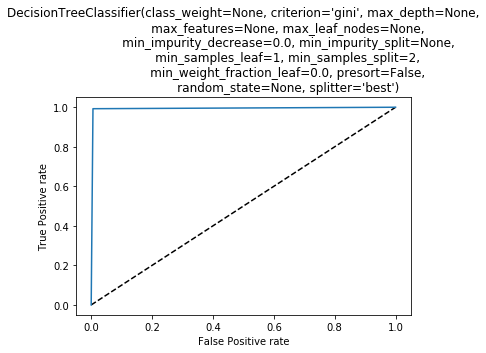

roc_score= 0.9933893195521102


In [51]:
#plot for roc_auc curve using roc(alg) function above declared
roc(dtc)

In [52]:
#saving the model using joblib
from sklearn.externals import joblib
joblib.dump(dtc,'Sbi_insurance.pkl')

['Sbi_insurance.pkl']

## Conclusion

After importing the dataset,I put it to the dataframe first for data processing.I checked for the null values and other info of each features.I checked for the skewed values and adjust them.I use various plots to get the data insights.To get the statistical summary,I use describe which shows data is fair to apply for machine learning.After applying various machine learning model,I get the Decision Tree as the best fit algorithm for this data